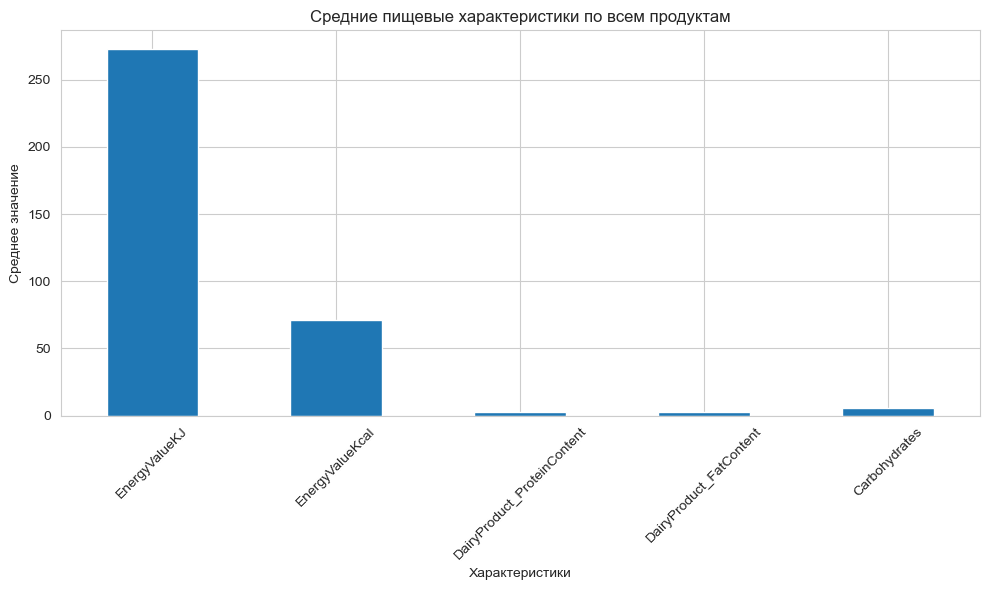

Примеры состава ингредиентов и происхождения сырья:                               DairyProduct_LabelName  \
0  Верхнедвинский Детское Сыр пастеризованное, ма...   
1  Кобринский Ягодное Творог пастеризованное, мас...   
2  Лидский Натуральное Масло пастеризованное, мас...   
3  Пружанский Фитнес Сыр пастеризованное, массова...   
4  Здравушка-милк Классическое Йогурт пастеризова...   

  DairyProduct_RawMaterialOrigin DairyProduct_PackagingMaterial  
0                         КОРОВА                          LLDPE  
1                         КОРОВА                          LLDPE  
2                         КОРОВА                          LLDPE  
3                         КОРОВА                          LLDPE  
4                         КОРОВА                          LLDPE  


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_products.csv')

nutritional_values = data[['EnergyValueKJ', 'EnergyValueKcal', 'DairyProduct_ProteinContent', 'DairyProduct_FatContent', 'Carbohydrates']]
mean_nutritional_values = nutritional_values.mean()

plt.figure(figsize=(10, 6))
mean_nutritional_values.plot(kind='bar', rot=45)
plt.title('Средние пищевые характеристики по всем продуктам')
plt.xlabel('Характеристики')
plt.ylabel('Среднее значение')
plt.tight_layout()
plt.show()

ingredients = data[['DairyProduct_LabelName', 'DairyProduct_RawMaterialOrigin', 'DairyProduct_PackagingMaterial']]

print("Примеры состава ингредиентов и происхождения сырья:", ingredients.head())

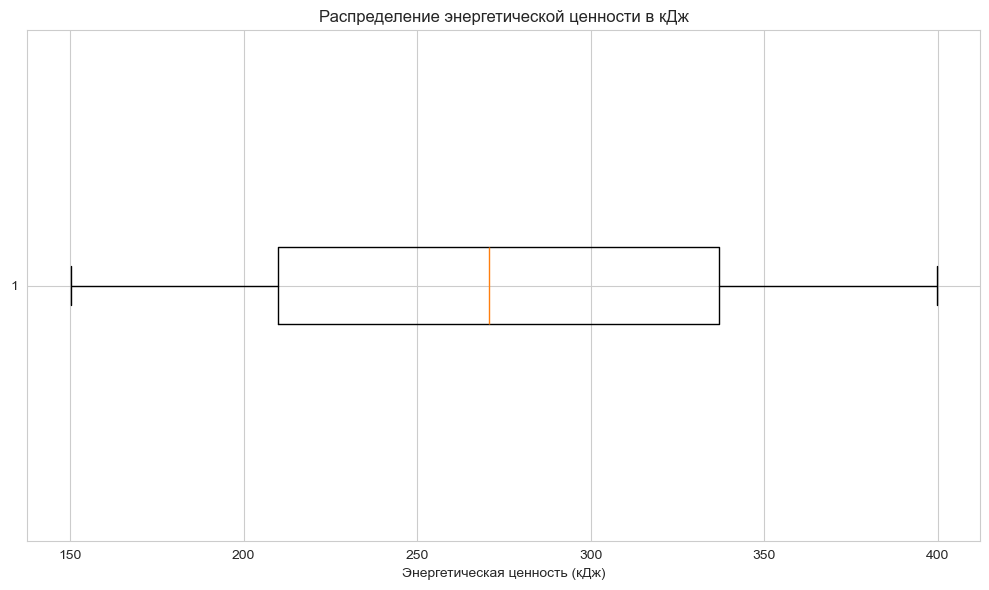

In [8]:
nutritional_values = data[['EnergyValueKJ', 'EnergyValueKcal', 'DairyProduct_ProteinContent', 'DairyProduct_FatContent', 'Carbohydrates']]

plt.figure(figsize=(10, 6))
plt.boxplot(nutritional_values['EnergyValueKJ'], vert=False)
plt.title('Распределение энергетической ценности в кДж')
plt.xlabel('Энергетическая ценность (кДж)')
plt.tight_layout()
plt.show()

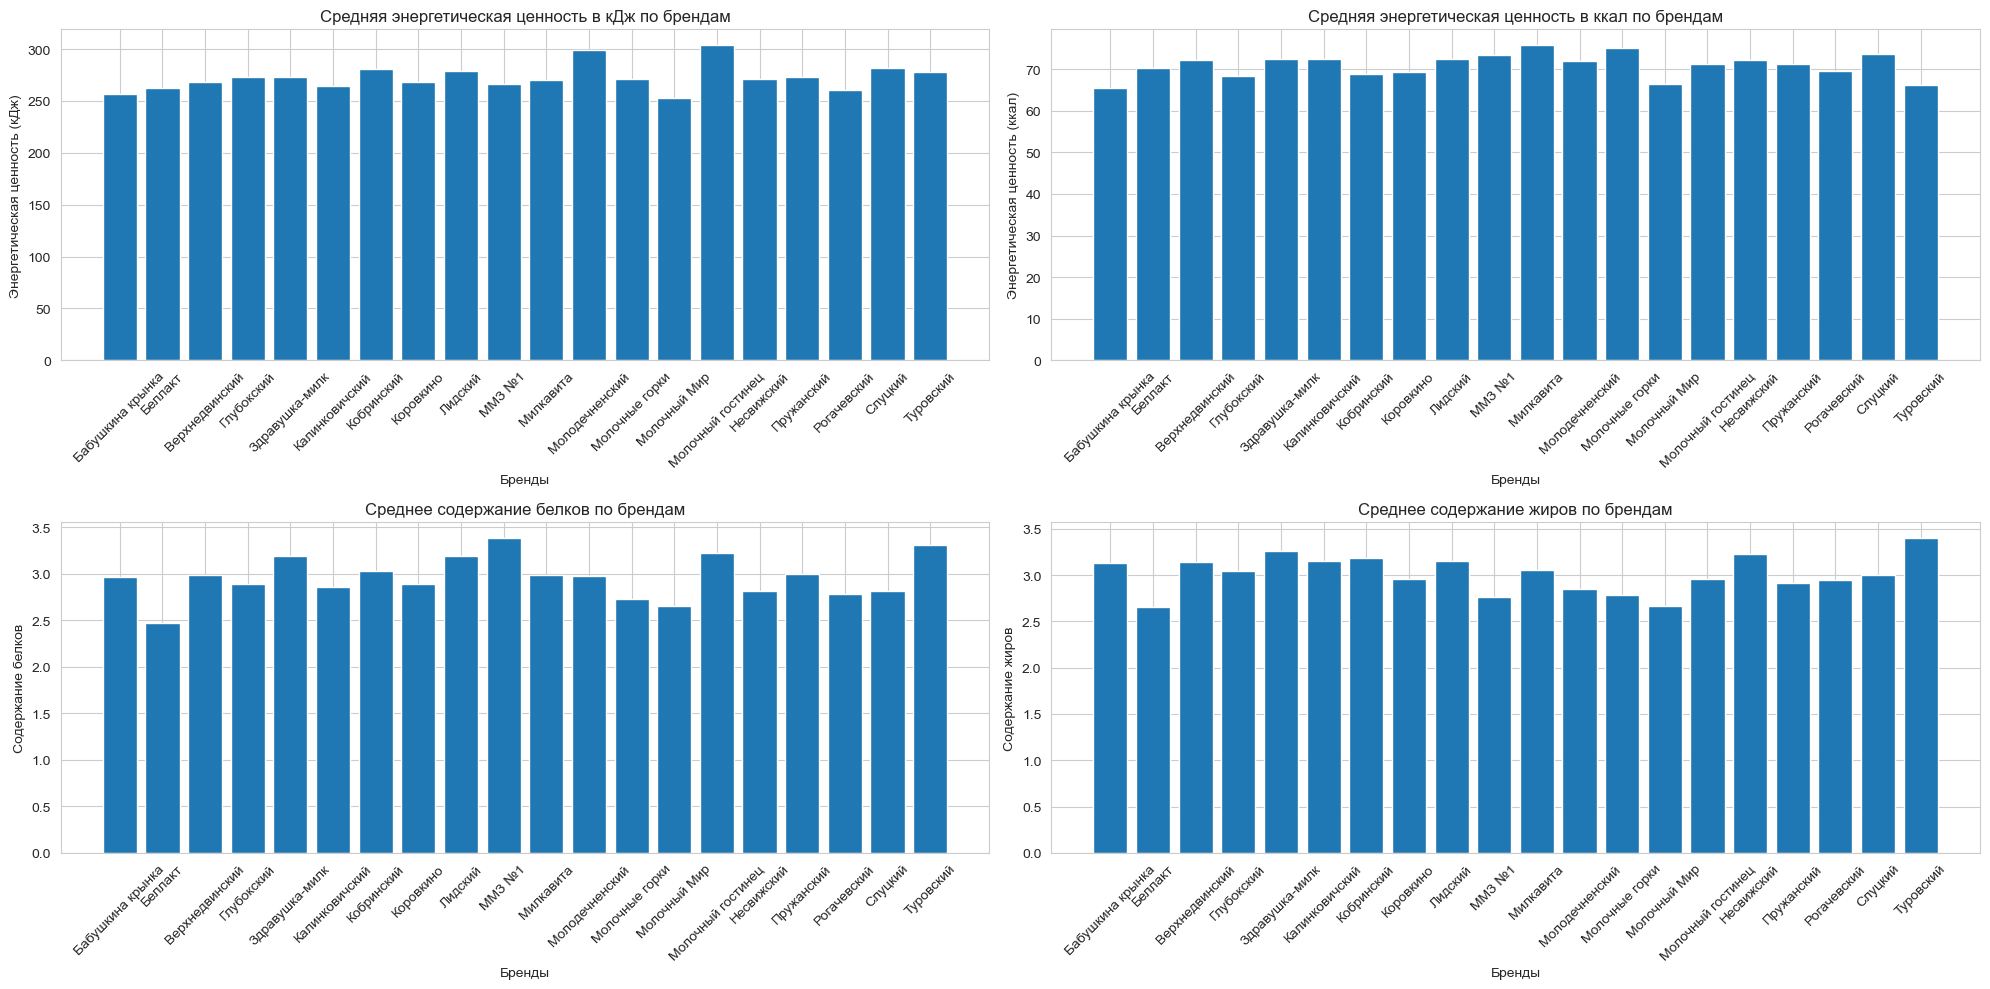

In [12]:
mean_nutritional_values_by_brand = data.groupby('BrandRu').agg({
    'EnergyValueKJ': 'mean',
    'EnergyValueKcal': 'mean',
    'DairyProduct_ProteinContent': 'mean',
    'DairyProduct_FatContent': 'mean',
    'Carbohydrates': 'mean'
}).reset_index()

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.bar(mean_nutritional_values_by_brand['BrandRu'], mean_nutritional_values_by_brand['EnergyValueKJ'])
plt.title('Средняя энергетическая ценность в кДж по брендам')
plt.xticks(rotation=45)
plt.xlabel('Бренды')
plt.ylabel('Энергетическая ценность (кДж)')

plt.subplot(2, 2, 2)
plt.bar(mean_nutritional_values_by_brand['BrandRu'], mean_nutritional_values_by_brand['EnergyValueKcal'])
plt.title('Средняя энергетическая ценность в ккал по брендам')
plt.xticks(rotation=45)
plt.xlabel('Бренды')
plt.ylabel('Энергетическая ценность (ккал)')

plt.subplot(2, 2, 3)
plt.bar(mean_nutritional_values_by_brand['BrandRu'], mean_nutritional_values_by_brand['DairyProduct_ProteinContent'])
plt.title('Среднее содержание белков по брендам')
plt.xticks(rotation=45)
plt.xlabel('Бренды')
plt.ylabel('Содержание белков')

plt.subplot(2, 2, 4)
plt.bar(mean_nutritional_values_by_brand['BrandRu'], mean_nutritional_values_by_brand['DairyProduct_FatContent'])
plt.title('Среднее содержание жиров по брендам')
plt.xticks(rotation=45)
plt.xlabel('Бренды')
plt.ylabel('Содержание жиров')

plt.tight_layout()
plt.show()

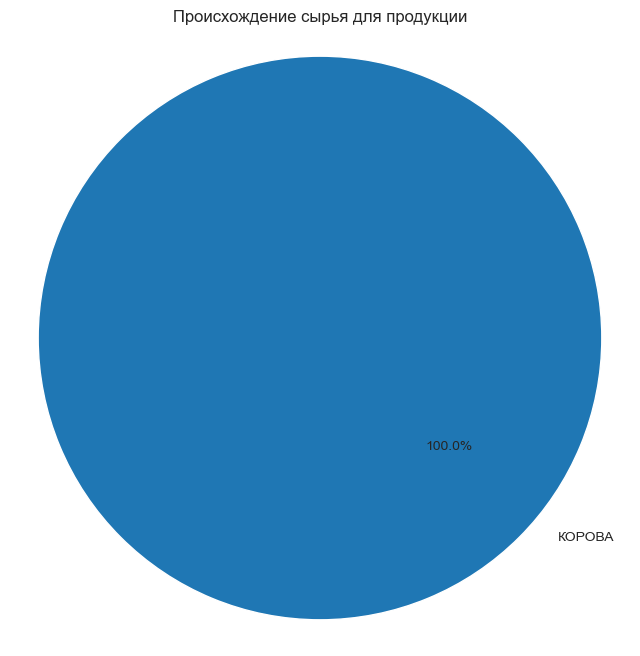

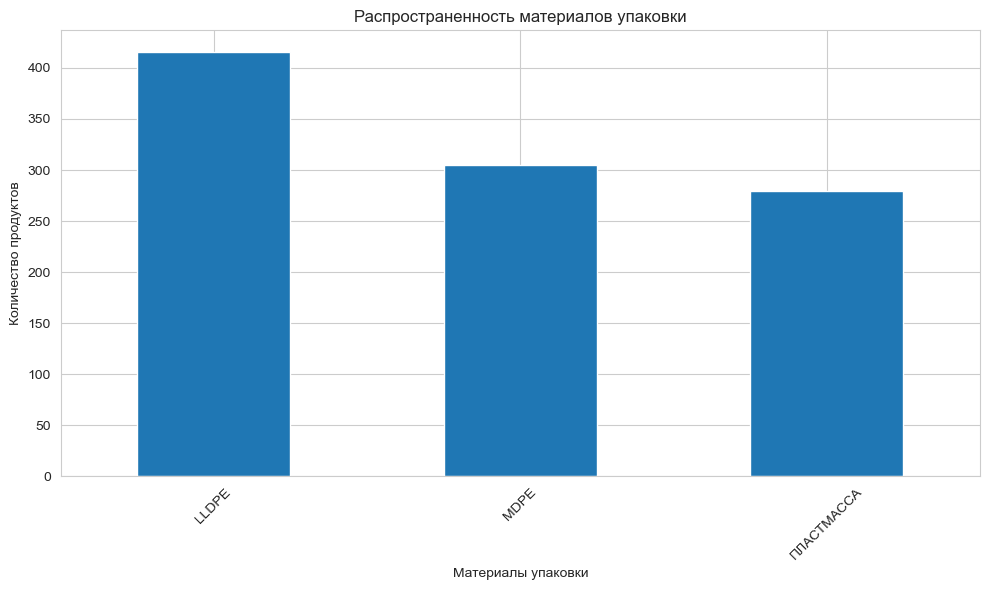

In [16]:
raw_material_origin_counts = data['DairyProduct_RawMaterialOrigin'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(raw_material_origin_counts, labels=raw_material_origin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Происхождение сырья для продукции')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

packaging_material_counts = data['DairyProduct_PackagingMaterial'].value_counts().head(10)

plt.figure(figsize=(10, 6))
packaging_material_counts.plot(kind='bar', rot=45)
plt.title('Распространенность материалов упаковки')
plt.xlabel('Материалы упаковки')
plt.ylabel('Количество продуктов')
plt.tight_layout()
plt.show()

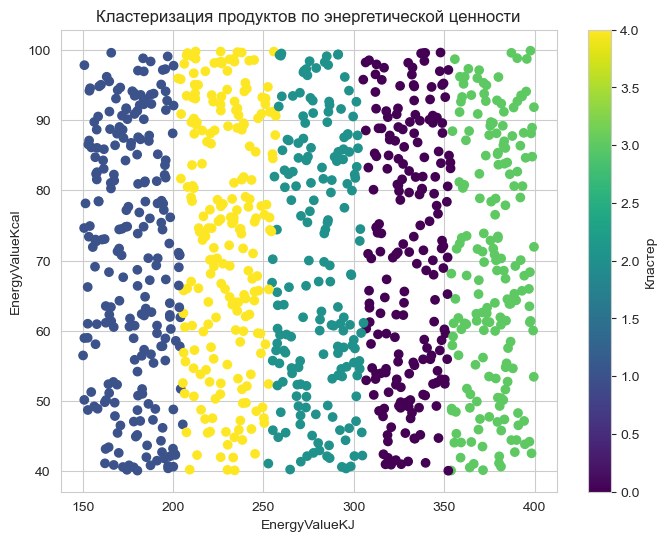

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features_for_clustering = data[['EnergyValueKJ', 'EnergyValueKcal', 'DairyProduct_ProteinContent', 'DairyProduct_FatContent', 'Carbohydrates']].values

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_for_clustering)

plt.figure(figsize=(8, 6))
plt.scatter(features_for_clustering[:, 0], features_for_clustering[:, 1], c=clusters, cmap='viridis')
plt.xlabel('EnergyValueKJ')
plt.ylabel('EnergyValueKcal')
plt.title('Кластеризация продуктов по энергетической ценности')
plt.colorbar(label='Кластер')
plt.show()